In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
import pandas as pd

In [13]:
raw = pd.read_csv('gdrive/My Drive/lifehack/[SCRAPPED] dataset_jantung.csv')
raw = raw[raw['category'].isin(['stroke', 'gagal-jantung', 'aritmia', 'serangan-jantung'])]
hipertensi = pd.read_csv('gdrive/My Drive/lifehack/hipertensi.csv')
raw = pd.concat([raw,hipertensi])
raw.head()

Unnamed: 0  ...                                           question
251         251  ...  Malam dok..dok saya mau brtanya ayah saya akhi...
252         252  ...  selamat pagihallo doktersaya mau tanya , menga...
253         253  ...  Dok,,saya ingin bertanya mengapa tangan dan ka...
254         254  ...  Dok, ibu saya menderita stroke dan hb nya rend...
255         255  ...  Halo dok, kenapa ya dok kedua mata saya ini ka...

[5 rows x 4 columns]

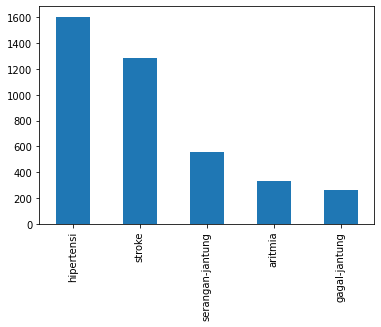

In [17]:
raw['category'].value_counts().plot(kind='bar')

In [15]:
sampled = raw.groupby('category').apply(lambda x: x.sample(n=260))
sampled['category'].value_counts()

stroke              260
gagal-jantung       260
serangan-jantung    260
hipertensi          260
aritmia             260
Name: category, dtype: int64

In [16]:
sampled.to_csv('gdrive/My Drive/lifehack/raw_sampled_data.csv')

In [41]:
sampled.head()

Unnamed: 0  ...                                           question
category                   ...                                                   
aritmia  909          909  ...   perkenalkan nama saya diki usia 33 thn. saya ...
         2303        2303  ...      kadang kadang ini saya kram otot dada hing...
         2308        2308  ...    , knpjantung saya berdetak tidak beraturan s...
         475          475  ...    yg terhormat,,, mengenai obat antimo yg di c...
         2254        2254  ...  saya perempuan 20 tahun kemaren lusa tiba tiba...

[5 rows x 4 columns]

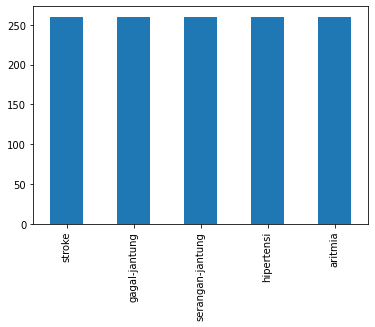

In [43]:
sampled['category'].value_counts().plot(kind ='bar')

In [24]:
train = pd.read_csv('gdrive/My Drive/lifehack/trainFinal.csv')
train['category'].value_counts()

serangan-jantung    213
gagal-jantung       211
stroke              210
hipertensi          205
aritmia             201
Name: category, dtype: int64

In [25]:
test = pd.read_csv('gdrive/My Drive/lifehack/testFinal.csv')
test['category'].value_counts()

aritmia             59
hipertensi          55
stroke              50
gagal-jantung       49
serangan-jantung    47
Name: category, dtype: int64

Performance Accuracy of Prediction using Raw Data

In [56]:
predicted_raw = pd.read_csv('gdrive/My Drive/lifehack/prediction_final_raw_5.csv')
predicted_raw.head()

Unnamed: 0  ...              pred
0        1001  ...           aritmia
1        1266  ...            stroke
2         503  ...  serangan-jantung
3         756  ...        hipertensi
4         459  ...            stroke

[5 rows x 8 columns]

In [67]:
c = confusion_matrix(predicted_raw['category.1'], predicted_raw['pred'], labels=['hipertensi', 'aritmia', 'gagal-jantung', 'stroke', 'serangan-jantung'])
print(c)

[[45  1  2  4  3]
 [ 2 42  3  2 10]
 [ 4  3 29  2 11]
 [ 5  0  1 43  1]
 [ 0  8  5  0 34]]


In [58]:
import seaborn as sns
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
        
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

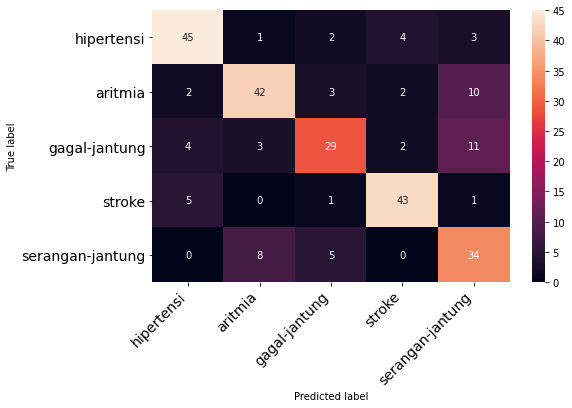

In [69]:
class_names = ['hipertensi', 'aritmia', 'gagal-jantung', 'stroke', 'serangan-jantung']
class_names
print_confusion_matrix(c, class_names, (8,5))

In [60]:
print(classification_report(predicted_raw['category.1'], predicted_raw['pred']))

                  precision    recall  f1-score   support

         aritmia       0.78      0.71      0.74        59
   gagal-jantung       0.72      0.59      0.65        49
      hipertensi       0.80      0.82      0.81        55
serangan-jantung       0.58      0.72      0.64        47
          stroke       0.84      0.86      0.85        50

        accuracy                           0.74       260
       macro avg       0.75      0.74      0.74       260
    weighted avg       0.75      0.74      0.74       260



Investigating the Reason for Low Sensitivity(Recall) Classes (serangan-jantung and gagal-jantung)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
['ibuk sayya', 'sayya lgi', 'lgi diraway', 'diraway drs', 'drs ,', ', ,ka', ',ka gagal', 'gagal jantung', 'jantung .', '. kl', 'kl dibuat', 'dibuat tidur', 'tidur mesti', 'mesti sesak', 'sesak ,', ', ,slalu', ',slalu minta', 'minta duduk', 'duduk ,', ', ,', ', ,', ', apakah', 'apakah diperbolehkan', 'diperbolehkan ?', '? ?', '? ?', '? ?', '? ?', '? trimakasih', 'trimakasih sebelumnya', 'sebelumnya apakah', 'apakah perbedaan', 'perbedaan gagal', 'gagal jantung', 'jantung dengan', 'dengan decompensasi', 'decompensasi cortis', 'cortis ?', '? ,', ', mamah', 'mamah saya', 'saya kalo', 'kalo kecapean', 'kecapean ,', ', atau', 'atau jalan', 'jalan jauh', 'jauh itu', 'itu betis', 'betis nya', 'nya bengkak', 'bengkak ,', ', kirakira', 'kirakira aku', 'aku sakit', 'sakit ap

(-0.5, 1499.5, 999.5, -0.5)

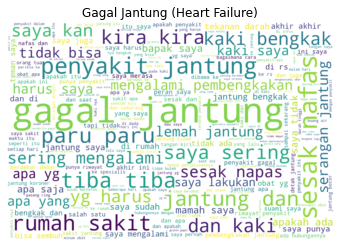

In [51]:
import nltk
from wordcloud import WordCloud, STOPWORDS
import nltk
nltk.download('punkt')
nltk.download('wordnet')
import re
from sklearn import feature_extraction

WNL = nltk.WordNetLemmatizer()
def check_rev(review):
  if type(review) == str:
    return review
  else:
    return ''
text = " ".join(check_rev(review) for review in sampled[sampled['category']=='gagal-jantung'].question)
# Lowercase and tokenize
text = text.lower()
# Remove single quote early since it causes problems with the tokenizer.
text = text.replace("'", "")
tokens = nltk.word_tokenize(text)
text1 = nltk.Text(tokens)

text_content = [word for word in text1]
# After the punctuation above is removed it still leaves empty entries in the list.
text_content = [s for s in text_content if len(s) != 0]

nltk_tokens = nltk.word_tokenize(text)  
#unigrams_list = list(nltk.unigrams(text_content))
bigrams_list = list(nltk.bigrams(text_content))
#print(bigrams_list)
dictionary2 = [' '.join(tup) for tup in bigrams_list]
print (dictionary2)

#Using count vectoriser to view the frequency of bigrams
vectorizer = feature_extraction.text.CountVectorizer(ngram_range=(2, 3))
bag_of_words = vectorizer.fit_transform(dictionary2)
vectorizer.vocabulary_
sum_words = bag_of_words.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
print (words_freq[:100])

#Generating wordcloud and saving as jpg image
words_dict = dict(words_freq)
WC_height = 1000
WC_width = 1500
WC_max_words = 200
wordCloud = WordCloud(max_words=WC_max_words, height=WC_height, width=WC_width,background_color='white')
wordCloud.generate_from_frequencies(words_dict)
plt.title('Gagal Jantung (Heart Failure)')
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis("off")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
['saya laki2', 'laki2 umur', 'umur 33th.10bulan', '33th.10bulan lalu', 'lalu saya', 'saya pasang', 'pasang ring', 'ring jantung', 'jantung di', 'di rs', 'rs harkit.tpi', 'harkit.tpi stlah', 'stlah 10bulan', '10bulan saya', 'saya kmbali', 'kmbali trkena', 'trkena serangan', 'serangan jantung', 'jantung pdhal', 'pdhal saya', 'saya sll', 'sll mnum', 'mnum obat', 'obat dan', 'dan jaga', 'jaga makanan', 'makanan saya.yg', 'saya.yg kan', 'kan apakah', 'apakah sumbatan', 'sumbatan jantung', 'jantung saya', 'saya kambuh', 'kambuh krn', 'krn pkerjaan', 'pkerjaan saya', 'saya yg', 'yg trll', 'trll berat', 'berat (', '( apakah', 'apakah kerja', 'kerja berat', 'berat bisa', 'bisa mempercepat', 'mempercepat sumbatan', 'sumbatan jantung', 'jantung )', ') ...', '... apkah', 'apk

(-0.5, 1499.5, 999.5, -0.5)

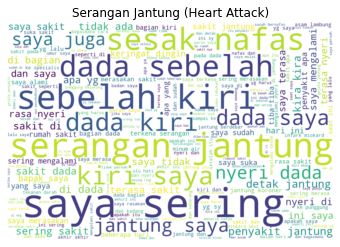

In [52]:
import nltk
from wordcloud import WordCloud, STOPWORDS
import nltk
nltk.download('punkt')
nltk.download('wordnet')
import re
from sklearn import feature_extraction

WNL = nltk.WordNetLemmatizer()
def check_rev(review):
  if type(review) == str:
    return review
  else:
    return ''
text = " ".join(check_rev(review) for review in sampled[sampled['category']=='serangan-jantung'].question)
# Lowercase and tokenize
text = text.lower()
# Remove single quote early since it causes problems with the tokenizer.
text = text.replace("'", "")
tokens = nltk.word_tokenize(text)
text1 = nltk.Text(tokens)

text_content = [word for word in text1]
# After the punctuation above is removed it still leaves empty entries in the list.
text_content = [s for s in text_content if len(s) != 0]

nltk_tokens = nltk.word_tokenize(text)  
#unigrams_list = list(nltk.unigrams(text_content))
bigrams_list = list(nltk.bigrams(text_content))
#print(bigrams_list)
dictionary2 = [' '.join(tup) for tup in bigrams_list]
print (dictionary2)

#Using count vectoriser to view the frequency of bigrams
vectorizer = feature_extraction.text.CountVectorizer(ngram_range=(2, 3))
bag_of_words = vectorizer.fit_transform(dictionary2)
vectorizer.vocabulary_
sum_words = bag_of_words.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
print (words_freq[:100])

#Generating wordcloud and saving as jpg image
words_dict = dict(words_freq)
WC_height = 1000
WC_width = 1500
WC_max_words = 200
wordCloud = WordCloud(max_words=WC_max_words, height=WC_height, width=WC_width,background_color='white')
wordCloud.generate_from_frequencies(words_dict)
plt.title('Serangan Jantung (Heart Attack)')
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis("off")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
['perkenalkan nama', 'nama saya', 'saya diki', 'diki usia', 'usia 33', '33 thn', 'thn .', '. saya', 'saya mempunyai', 'mempunyai keluhan', 'keluhan yg', 'yg saya', 'saya rasakan', 'rasakan sudah', 'sudah lama', 'lama pertama', 'pertama sy', 'sy rasakan', 'rasakan pada', 'pada tahun', 'tahun 2013.', '2013. sesekali', 'sesekali suka', 'suka ada', 'ada hentakan', 'hentakan di', 'di dada', 'dada serasa', 'serasa seperti', 'seperti hentakan', 'hentakan di', 'di jantung..keluhan', 'jantung..keluhan ini', 'ini hilang', 'hilang timbul', 'timbul ...', '... kadang', 'kadang timbul', 'timbul kadang', 'kadang gak', 'gak pernah', 'pernah timbul', 'timbul sama', 'sama sekali', 'sekali .', '. biasanya', 'biasanya kambuhnya', 'kambuhnya berbarengan', 'berbarengan dengan', 'dengan

(-0.5, 1499.5, 999.5, -0.5)

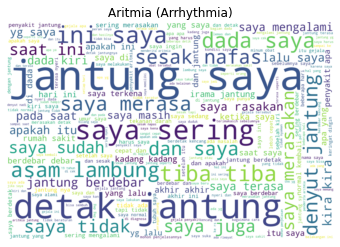

In [53]:
import nltk
from wordcloud import WordCloud, STOPWORDS
import nltk
nltk.download('punkt')
nltk.download('wordnet')
import re
from sklearn import feature_extraction

WNL = nltk.WordNetLemmatizer()
def check_rev(review):
  if type(review) == str:
    return review
  else:
    return ''
text = " ".join(check_rev(review) for review in sampled[sampled['category']=='aritmia'].question)
# Lowercase and tokenize
text = text.lower()
# Remove single quote early since it causes problems with the tokenizer.
text = text.replace("'", "")
tokens = nltk.word_tokenize(text)
text1 = nltk.Text(tokens)

text_content = [word for word in text1]
# After the punctuation above is removed it still leaves empty entries in the list.
text_content = [s for s in text_content if len(s) != 0]

nltk_tokens = nltk.word_tokenize(text)  
#unigrams_list = list(nltk.unigrams(text_content))
bigrams_list = list(nltk.bigrams(text_content))
#print(bigrams_list)
dictionary2 = [' '.join(tup) for tup in bigrams_list]
print (dictionary2)

#Using count vectoriser to view the frequency of bigrams
vectorizer = feature_extraction.text.CountVectorizer(ngram_range=(2, 3))
bag_of_words = vectorizer.fit_transform(dictionary2)
vectorizer.vocabulary_
sum_words = bag_of_words.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
print (words_freq[:100])

#Generating wordcloud and saving as jpg image
words_dict = dict(words_freq)
WC_height = 1000
WC_width = 1500
WC_max_words = 200
wordCloud = WordCloud(max_words=WC_max_words, height=WC_height, width=WC_width,background_color='white')
wordCloud.generate_from_frequencies(words_dict)
plt.title('Aritmia (Arrhythmia)')
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis("off")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[', .', '. kebetulan', 'kebetulan teman', 'teman saya', 'saya 2', '2 hari', 'hari yang', 'yang lalu', 'lalu meninggal', 'meninggal karena', 'karena terjadi', 'terjadi penggumpalan', 'penggumpalan darah', 'darah di', 'di otak', 'otak dan', 'dan dalam', 'dalam keadaan', 'keadaan mengandung', 'mengandung 6', '6 bulan', 'bulan .', '. apakah', 'apakah penyebab', 'penyebab dari', 'dari penggumpalan', 'penggumpalan darah', 'darah di', 'di otak', 'otak ?', '? apakah', 'apakah terlalu', 'terlalu banyak', 'banyak beban', 'beban pikiran', 'pikiran termasuk', 'termasuk penyebabnya', 'penyebabnya ?', '? terimakasih', 'terimakasih ..', '.. ibu', 'ibu aq', 'aq tensi', 'tensi ny', 'ny tinggi', 'tinggi 200/100', '200/100 dia', 'dia tidak', 'tidak merasakan', 'merasakan pusing', 'p

(-0.5, 1499.5, 999.5, -0.5)

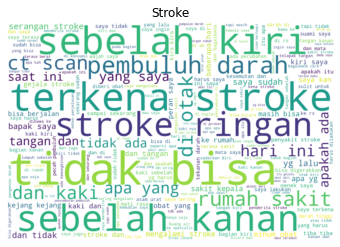

In [54]:
import nltk
from wordcloud import WordCloud, STOPWORDS
import nltk
nltk.download('punkt')
nltk.download('wordnet')
import re
from sklearn import feature_extraction

WNL = nltk.WordNetLemmatizer()
def check_rev(review):
  if type(review) == str:
    return review
  else:
    return ''
text = " ".join(check_rev(review) for review in sampled[sampled['category']=='stroke'].question)
# Lowercase and tokenize
text = text.lower()
# Remove single quote early since it causes problems with the tokenizer.
text = text.replace("'", "")
tokens = nltk.word_tokenize(text)
text1 = nltk.Text(tokens)

text_content = [word for word in text1]
# After the punctuation above is removed it still leaves empty entries in the list.
text_content = [s for s in text_content if len(s) != 0]

nltk_tokens = nltk.word_tokenize(text)  
#unigrams_list = list(nltk.unigrams(text_content))
bigrams_list = list(nltk.bigrams(text_content))
#print(bigrams_list)
dictionary2 = [' '.join(tup) for tup in bigrams_list]
print (dictionary2)

#Using count vectoriser to view the frequency of bigrams
vectorizer = feature_extraction.text.CountVectorizer(ngram_range=(2, 3))
bag_of_words = vectorizer.fit_transform(dictionary2)
vectorizer.vocabulary_
sum_words = bag_of_words.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
print (words_freq[:100])

#Generating wordcloud and saving as jpg image
words_dict = dict(words_freq)
WC_height = 1000
WC_width = 1500
WC_max_words = 200
wordCloud = WordCloud(max_words=WC_max_words, height=WC_height, width=WC_width,background_color='white')
wordCloud.generate_from_frequencies(words_dict)
plt.title('Stroke')
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis("off")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
['. menderita', 'menderita hipertensi', 'hipertensi .', '. 1', '1 bulan', 'bulan yg', 'yg lalu', 'lalu mendapat', 'mendapat obat', 'obat irbesartan', 'irbesartan 300mg+hct', '300mg+hct 12.5.', '12.5. dua', 'dua minggu', 'minggu kemudian', 'kemudian dosis', 'dosis d', 'd turunkan', 'turunkan oleh', 'oleh menjadi', 'menjadi 150', '150 mg.', 'mg. peran', 'peran saya', 'saya .', '. setelah', 'setelah dosisnya', 'dosisnya 150', '150 mg', 'mg bagaimana', 'bagaimana menurunkan', 'menurunkan dosis', 'dosis obat', 'obat tersebut', 'tersebut ?', '? apakah', 'apakah bs', 'bs d', 'd ganti', 'ganti obat', 'obat yg', 'yg lain', 'lain atau', 'atau turun', 'turun menjadi', 'menjadi 75', '75 mg', 'mg per', 'per hari', 'hari ?', '? terimakasih', 'terimakasih .', '. wasialaikum', 'w

(-0.5, 1499.5, 999.5, -0.5)

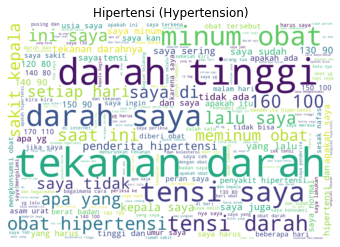

In [55]:
import nltk
from wordcloud import WordCloud, STOPWORDS
import nltk
nltk.download('punkt')
nltk.download('wordnet')
import re
from sklearn import feature_extraction

WNL = nltk.WordNetLemmatizer()
def check_rev(review):
  if type(review) == str:
    return review
  else:
    return ''
text = " ".join(check_rev(review) for review in sampled[sampled['category']=='hipertensi'].question)
# Lowercase and tokenize
text = text.lower()
# Remove single quote early since it causes problems with the tokenizer.
text = text.replace("'", "")
tokens = nltk.word_tokenize(text)
text1 = nltk.Text(tokens)

text_content = [word for word in text1]
# After the punctuation above is removed it still leaves empty entries in the list.
text_content = [s for s in text_content if len(s) != 0]

nltk_tokens = nltk.word_tokenize(text)  
#unigrams_list = list(nltk.unigrams(text_content))
bigrams_list = list(nltk.bigrams(text_content))
#print(bigrams_list)
dictionary2 = [' '.join(tup) for tup in bigrams_list]
print (dictionary2)

#Using count vectoriser to view the frequency of bigrams
vectorizer = feature_extraction.text.CountVectorizer(ngram_range=(2, 3))
bag_of_words = vectorizer.fit_transform(dictionary2)
vectorizer.vocabulary_
sum_words = bag_of_words.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
print (words_freq[:100])

#Generating wordcloud and saving as jpg image
words_dict = dict(words_freq)
WC_height = 1000
WC_width = 1500
WC_max_words = 200
wordCloud = WordCloud(max_words=WC_max_words, height=WC_height, width=WC_width,background_color='white')
wordCloud.generate_from_frequencies(words_dict)
plt.title('Hipertensi (Hypertension)')
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis("off")

In [19]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
% matplotlib inline

Unigram wordcloud

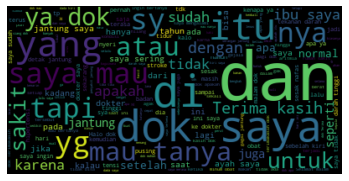

In [20]:
def check_rev(review):
  if type(review) == str:
    return review
  else:
    return ''
text = " ".join(check_rev(review) for review in sampled.question)

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Bigram wordcloud

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[('selamat', 'pagi'), ('pagi', 'dok'), ('dok', 'perkenalkan'), ('perkenalkan', 'nama'), ('nama', 'saya'), ('saya', 'diki'), ('diki', 'usia'), ('usia', '33'), ('33', 'thn'), ('thn', '.'), ('.', 'saya'), ('saya', 'mempunyai'), ('mempunyai', 'keluhan'), ('keluhan', 'yg'), ('yg', 'saya'), ('saya', 'rasakan'), ('rasakan', 'sudah'), ('sudah', 'lama'), ('lama', 'pertama'), ('pertama', 'sy'), ('sy', 'rasakan'), ('rasakan', 'pada'), ('pada', 'tahun'), ('tahun', '2013.'), ('2013.', 'sesekali'), ('sesekali', 'suka'), ('suka', 'ada'), ('ada', 'hentakan'), ('hentakan', 'di'), ('di', 'dada'), ('dada', 'serasa'), ('serasa', 'seperti'), ('seperti', 'hentakan'), ('hentakan', 'di'), ('di', 'jantung..keluhan'), ('jantung..keluhan', 'ini'), ('ini', 'hilang'), ('hilang', 'timbul'), ('

(-0.5, 1499.5, 999.5, -0.5)

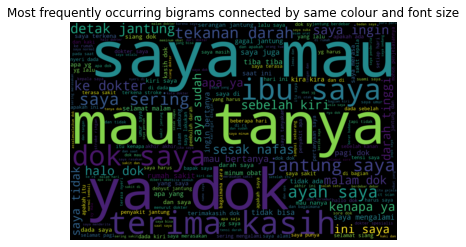

In [28]:
import nltk
from wordcloud import WordCloud, STOPWORDS
import nltk
nltk.download('punkt')
nltk.download('wordnet')
import re
from sklearn import feature_extraction

WNL = nltk.WordNetLemmatizer()
def check_rev(review):
  if type(review) == str:
    return review
  else:
    return ''
text = " ".join(check_rev(review) for review in sampled.question)
# Lowercase and tokenize
text = text.lower()
# Remove single quote early since it causes problems with the tokenizer.
text = text.replace("'", "")
tokens = nltk.word_tokenize(text)
text1 = nltk.Text(tokens)

text_content = [word for word in text1]
# After the punctuation above is removed it still leaves empty entries in the list.
text_content = [s for s in text_content if len(s) != 0]


nltk_tokens = nltk.word_tokenize(text)  
bigrams_list = list(nltk.bigrams(text_content))
print(bigrams_list)
dictionary2 = [' '.join(tup) for tup in bigrams_list]
print (dictionary2)

#Using count vectoriser to view the frequency of bigrams
vectorizer = feature_extraction.text.CountVectorizer(ngram_range=(2, 3))
bag_of_words = vectorizer.fit_transform(dictionary2)
vectorizer.vocabulary_
sum_words = bag_of_words.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
print (words_freq[:100])

#Generating wordcloud and saving as jpg image
words_dict = dict(words_freq)
WC_height = 1000
WC_width = 1500
WC_max_words = 200
wordCloud = WordCloud(max_words=WC_max_words, height=WC_height, width=WC_width)
wordCloud.generate_from_frequencies(words_dict)
plt.title('Most frequently occurring bigrams connected by same colour and font size')
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis("off")

In [29]:
words_freq

[('saya mau', 345),
 ('mau tanya', 282),
 ('ya dok', 267),
 ('terima kasih', 263),
 ('ibu saya', 244),
 ('dok saya', 219),
 ('jantung saya', 173),
 ('saya sering', 156),
 ('ayah saya', 155),
 ('tekanan darah', 134),
 ('detak jantung', 123),
 ('ke dokter', 119),
 ('saya ingin', 109),
 ('sebelah kiri', 107),
 ('sesak nafas', 106),
 ('kenapa ya', 103),
 ('halo dok', 102),
 ('malam dok', 96),
 ('darah tinggi', 96),
 ('saya sudah', 92),
 ('ini saya', 91),
 ('apa ya', 90),
 ('saya tidak', 89),
 ('mau bertanya', 83),
 ('saya mengalami', 83),
 ('ingin bertanya', 81),
 ('saya juga', 81),
 ('tidak bisa', 81),
 ('rumah sakit', 78),
 ('pagi dok', 77),
 ('tiba tiba', 77),
 ('gagal jantung', 75),
 ('kira kira', 74),
 ('saat ini', 73),
 ('apa yang', 72),
 ('selamat malam', 71),
 ('minum obat', 71),
 ('tidak ada', 71),
 ('serangan jantung', 70),
 ('kasih dok', 69),
 ('dada saya', 67),
 ('yang saya', 66),
 ('dan saya', 64),
 ('saya merasa', 63),
 ('siang dok', 63),
 ('apa yg', 61),
 ('terimakasih dok',

In [30]:
delete = list(map(lambda x:x[0],words_freq[:5])) + ['assalamualaikum', 'saya mau bertanya', 'saya ingin bertanya', 'halo dokter', 'halo dok', 'terima kasih dokter', 'terima kasih dok', 'selamat pagi dokter', 'selamat pagi dok', 'selamat siang dokter', 'selamat siang dok', 'selamat malam dokter', 'selamat malam dok', 'pagi dokter', 'pagi dok', 'siang dokter', 'siang dok', 'malam dokter', 'malam dok', 'selamat pagi', 'selamat siang', 'selamat malam', 'saya ingin bertanya', 'dokter', 'dok', 'halo', 'bertanya', 'nanya', 'selamat sore dokter', 'selamat sore dok', 'selamat sore', 'sore dokter', 'sore dok', 'sore', 'assalamu\'alaikum', 'halo', 'hallo', 'tanya', 'ayah saya', 'ibu saya', 'anak saya', 'kenapa', 'mama saya', 'tante saya', 'papa saya', 'mohon maaf', 'maaf', 'salam sehat', 'salam']
delete 

['saya mau',
 'mau tanya',
 'ya dok',
 'terima kasih',
 'ibu saya',
 'assalamualaikum',
 'saya mau bertanya',
 'saya ingin bertanya',
 'halo dokter',
 'halo dok',
 'terima kasih dokter',
 'terima kasih dok',
 'selamat pagi dokter',
 'selamat pagi dok',
 'selamat siang dokter',
 'selamat siang dok',
 'selamat malam dokter',
 'selamat malam dok',
 'pagi dokter',
 'pagi dok',
 'siang dokter',
 'siang dok',
 'malam dokter',
 'malam dok',
 'selamat pagi',
 'selamat siang',
 'selamat malam',
 'saya ingin bertanya',
 'dokter',
 'dok',
 'halo',
 'bertanya',
 'nanya',
 'selamat sore dokter',
 'selamat sore dok',
 'selamat sore',
 'sore dokter',
 'sore dok',
 'sore',
 "assalamu'alaikum",
 'halo',
 'hallo',
 'tanya',
 'ayah saya',
 'ibu saya',
 'anak saya',
 'kenapa',
 'mama saya',
 'tante saya',
 'papa saya',
 'mohon maaf',
 'maaf',
 'salam sehat',
 'salam']

In [32]:
for word in delete:
  sampled['question'] = sampled['question'].apply(lambda x:x.lower() if type(x)==str else x).str.replace(word, '')
sampled.head(50).reset_index(drop=True)

Unnamed: 0  ...                                           question
0          909  ...   perkenalkan nama saya diki usia 33 thn. saya ...
1         2303  ...      kadang kadang ini saya kram otot dada hing...
2         2308  ...    , knpjantung saya berdetak tidak beraturan s...
3          475  ...    yg terhormat,,, mengenai obat antimo yg di c...
4         2254  ...  saya perempuan 20 tahun kemaren lusa tiba tiba...
5         2287  ...   umur saya 20 thn udah 4 bulan terakhir saya k...
6          882  ...   sejak 3 hari terakhir ini jantung saya sering...
7          432  ...   , kalau misalnya jantung berdebar cepat secar...
8          494  ...  \nsaya saya terkena aritmia, ini juga berdasar...
9         2291  ...  mlm  sy umur 17tahun. sy mengalami jantung sy ...
10         461  ...  permisi . usia saya 27thn.1bulan yg lalu saya ...
11         436  ...  dua tahun yang lalu saya mengalami aritmia ski...
12        2281  ...  ... mau   bulan kemarin 2 kali opname di rumah...
13        2372  ...  , knp ya saya sering merasakan jantung berdeta...
14        2340  ...  .\r\n dr taiwan\r\n tan, saya menderita aritim...
15         875  ...   3 hari kebelakang ini di dalam tubuh saya kay...
16        2309  ...  , akhir2 ini saya memang terlalu kecapekan dan...
17        2292  ...  ,saya osi 21 thn skrang lgi hamil anak pertama...
18        2382  ...   , saya ingin mekan masalah detak jantung saya...
19         448  ...   saya merasakan jantung saya sering berdetak m...
20         443  ...  ,\nnama saya abdul rozalil, saya 24th, 3 hari ...
21        2390  ...  pagi dr. mau ... minggu lalu sy merasakan jant...
22         439  ...  ,  !saya adalah orang dengan penyakit aritmia ...
23         908  ...  ,\r\n , kalau disritmia dengan aritmia itu sam...
24        2338  ...  , .\r\n\r\nsaya ingin , jantung saya sejak smp...
25         906  ...   saya wanita berusia 24 tahu. sejak 5 tahun te...
26         429  ...  umur nenek saya 84 th,dia punya dm tipe 2,neur...
27         480  ...  , . saya farhan, 17 tahun. sejak dua minggu ya...
28         460  ...  .  kondisi saya termasuk obes dengan imt > 30,...
29        2306  ...  saya pernah mengalami nyeri di dada kiri rasan...
30        2285  ...  saya wanita umur 23 tahun, sering mengalami ny...
31         897  ...  ,, ganggu\r\n tanter,,saya punya adik perempua...
32        2333  ...     , obat paten untuk penyakit aritmia yang de...
33         871  ...  , jadi  punya keluhan sesak, dan beberapa hari...
34         844  ...   smlm sy ke klinik, sy sesak napas rasanya oks...
35        2268  ...  izin bertan, waktu itu saya menjalani test tni...
36        2255  ...  , saya izin  kemarin saya melakukan mcu nah ha...
37        2366  ...   saya memiliki keluhan dada berdebar, dada ber...
38         878  ...  - bagaimana cara mendeteksi aritmia?\n- bisaka...
39         841  ...  siang,  berumur 55 tahun. jantungnya seminggu ...
40        2252  ...  , saya penderita aritmia dan sudah melakukan p...
41         425  ...  saya berusia 19 tahun.. yaa setiap saya melaku...
42         462  ...     saya tadi malem dada saya terasa nyeri dan ...
43        2358  ...   doc.\r\nnama saya alfadzry, umur saya 22thn,s...
44         433  ...  sya sering berkeringat dingin terutama dibagia...
45         472  ...   , detakan jantung saya tiba-tiba kuat dan ter...
46        2373  ...  ,.\r\nasmualaikum ,.\r\n  belakangan ini detak...
47         867  ...  ,\nperkenalkan saya wanitausia 33 tahun 9 bula...
48        2402  ...   ..\r\n  sejak masa kehamilan 4 bulan sampai s...
49         438  ...     apakah denyut jantung yg tak beraturan term...

[50 rows x 4 columns]

In [33]:
sampled.reset_index(drop=True).to_csv('gdrive/My Drive/lifehack/cleaned_sampled_data.csv')

Performance Accuracy of Prediction using Cleaned Data

In [61]:
predicted_cleaned = pd.read_csv('gdrive/My Drive/lifehack/prediction_final_cleaned_5.csv')
predicted_cleaned.head()

Unnamed: 0  ...              pred
0        1001  ...  serangan-jantung
1        1266  ...            stroke
2         503  ...     gagal-jantung
3         756  ...        hipertensi
4         459  ...            stroke

[5 rows x 7 columns]

In [62]:
c = confusion_matrix(predicted_cleaned['category'], predicted_cleaned['pred'], labels=['hipertensi', 'aritmia', 'gagal-jantung', 'stroke', 'serangan-jantung'])
print(c)

[[45  1  2  6  1]
 [ 0 40  6  2 11]
 [ 4  3 31  5  6]
 [ 2  0  2 45  1]
 [ 1  4 12  2 28]]


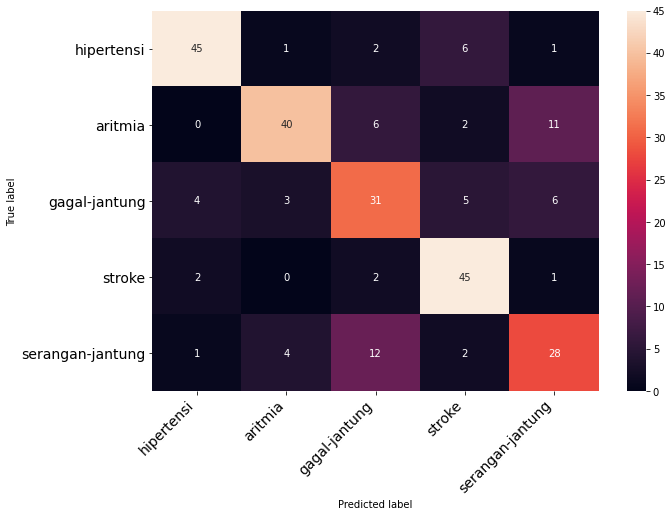

In [66]:
class_names = ['hipertensi', 'aritmia', 'gagal-jantung', 'stroke', 'serangan-jantung']
class_names
print_confusion_matrix(c, class_names, (10,7))

In [64]:
print(classification_report(predicted_cleaned['category'], predicted_cleaned['pred']))

                  precision    recall  f1-score   support

         aritmia       0.83      0.68      0.75        59
   gagal-jantung       0.58      0.63      0.61        49
      hipertensi       0.87      0.82      0.84        55
serangan-jantung       0.60      0.60      0.60        47
          stroke       0.75      0.90      0.82        50

        accuracy                           0.73       260
       macro avg       0.73      0.72      0.72       260
    weighted avg       0.73      0.73      0.73       260



In [ ]:
data = pd.read_csv('gdrive/My Drive/lifehack/prediction.csv')
data.head()

Unnamed: 0  ...              pred
0        1758  ...  serangan-jantung
1        1283  ...           aritmia
2        1404  ...  serangan-jantung
3          31  ...     gagal-jantung
4         625  ...           aritmia

[5 rows x 8 columns]

In [ ]:
actual_vs_pred = data[['category','pred']]
actual_vs_pred.head()

category              pred
0  serangan-jantung  serangan-jantung
1           aritmia           aritmia
2           aritmia  serangan-jantung
3            stroke     gagal-jantung
4           aritmia           aritmia

In [ ]:
from sklearn.metrics import *
precision_recall_fscore_support(actual_vs_pred['category'], actual_vs_pred['pred'])

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(array([0.71698113, 0.        , 0.43243243, 0.        , 0.60869565,
        0.46666667, 0.66666667, 0.68253968, 0.76666667, 0.        ]),
 array([0.65517241, 0.        , 0.64      , 0.        , 0.7       ,
        0.25925926, 0.5       , 0.72268908, 0.75409836, 0.        ]),
 array([0.68468468, 0.        , 0.51612903, 0.        , 0.65116279,
        0.33333333, 0.57142857, 0.70204082, 0.76033058, 0.        ]),
 array([ 58,   5,  50,   6,  20,  27,  16, 119,  61,   1]))

In [ ]:
print(classification_report(actual_vs_pred['category'], actual_vs_pred['pred']))

                          precision    recall  f1-score   support

                 aritmia       0.72      0.66      0.68        58
          aterosklerosis       0.00      0.00      0.00         5
           gagal-jantung       0.43      0.64      0.52        50
           kardiomiopati       0.00      0.00      0.00         6
 penyakit-jantung-bawaan       0.61      0.70      0.65        20
penyakit-jantung-koroner       0.47      0.26      0.33        27
  penyakit-katup-jantung       0.67      0.50      0.57        16
        serangan-jantung       0.68      0.72      0.70       119
                  stroke       0.77      0.75      0.76        61
    trombosis-vena-dalam       0.00      0.00      0.00         1

                accuracy                           0.64       363
               macro avg       0.43      0.42      0.42       363
            weighted avg       0.62      0.64      0.62       363



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
